In [1]:
import pandas
import sys
import os
from matplotlib import pyplot

from c1extra import boxplot, read_remote_sheet, get_cluster_maps, ODFReader

In [2]:
mouselimb = pandas.read_csv(
    '190425MouseLimb10XMeta.csv', 
    index_col=0, 
    dtype={'ident': int})

In [3]:
sheet = read_remote_sheet(
    "https://woldlab.caltech.edu/nextcloud/index.php/s/XNJQRJbWeXDyf78/download", 
    'genes_by_cluster')
#cluster_label, cluster_color, cluster_order
cluster_maps = get_cluster_maps(sheet, '10x_class', 'abbreviations')
cluster_label = cluster_maps['label']
cluster_color = cluster_maps['color']
cluster_order = cluster_maps['order']

mouselimb['cluster_name'] = mouselimb['ident'].apply(lambda x: cluster_label[x])

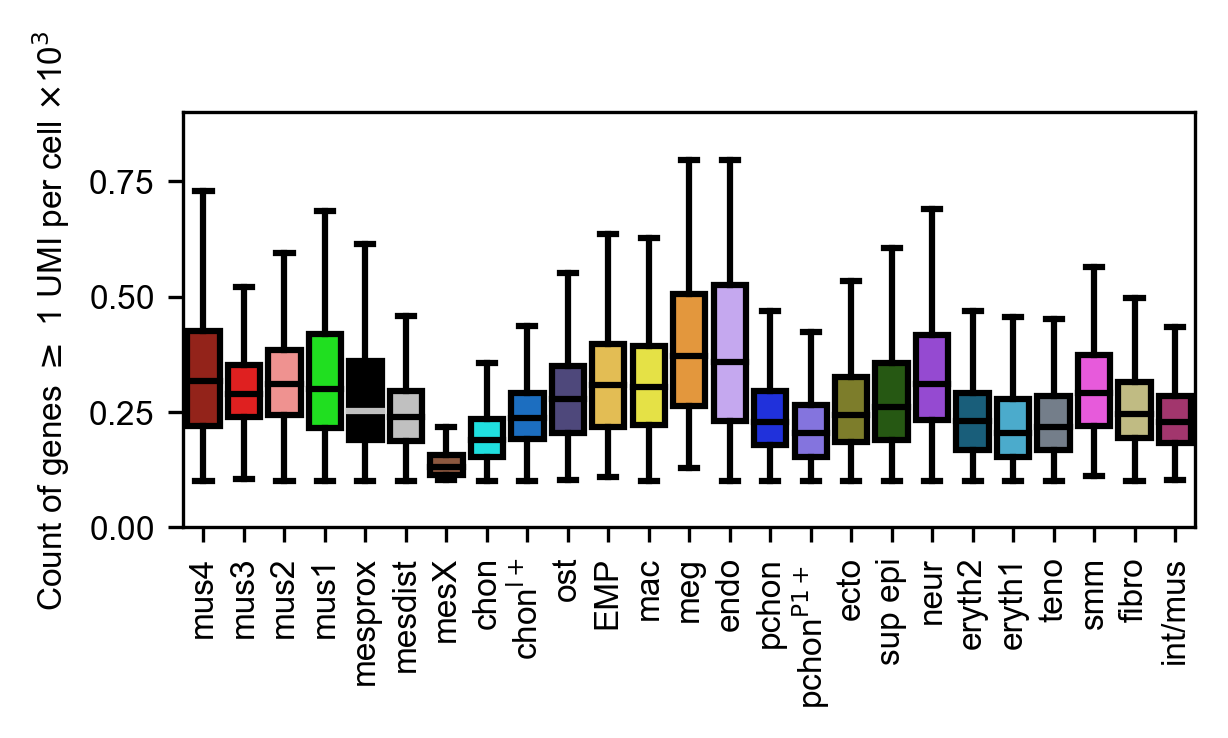

In [11]:
def plot_boxplot(expressed, color_dict, order):
    mm2inch = 25.4
    font_size = 8.0
    fontname='Arial'
    f = pyplot.figure(figsize=(105/mm2inch, 60/mm2inch), dpi=300)
    ax = f.add_subplot(1,1,1)
    ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0), useMathText=True)    
    bp = boxplot(x='cluster_name', y='nGene', 
                 order=order, 
                 palette=color_dict, 
                 data=expressed,                     
                 showfliers=False,
                 ax=ax)
    #_ = ax.set_ylabel('Count of genes $\geq$ 1 FPKM per cell', size=font_size)
    _ = ax.set_ylabel('Count of genes $\geq$ 1 UMI per cell $\\times$10$^3$', size=font_size, fontname=fontname)
    _ = ax.set_xlabel('')
    
    labels = ax.get_yticklabels()
    for l in labels:
        l.set_fontsize(font_size)
        l.set_fontname(fontname)

    labels = ax.get_xticklabels()
    for l in labels:
        l.set_fontsize(font_size)    
        l.set_fontname(fontname)

    _ = ax.set_xticklabels(labels, rotation=90, ha='center', fontsize=font_size, fontname=fontname)
    _ = ax.set_ylim(0, 9000)
    ax.get_yaxis().get_offset_text().set_visible(False)
    f.tight_layout()
    return f, ax
f, bp = plot_boxplot(mouselimb, cluster_color, cluster_order)

In [5]:
f.savefig('10x_genes_gt_1_UMI.png')
f.savefig('10x_genes_gt_1_UMI.eps')
f.savefig('10x_genes_gt_1_UMI.svg')

In [7]:
#f.savefig('10x_genes_gt_1_UMI.tiff')

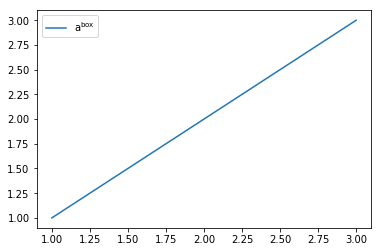

In [8]:
f = pyplot.figure()
ax = f.add_subplot(1,1,1)
ax.plot([1,2,3],[1,2,3], label='a$^{\mathrm{box}}$')
ax.legend()